## Purpose

Machine Learning Homework #5: Building a Recommender System

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statistics import mean

from surprise import Dataset, accuracy
from surprise import SVD, KNNBasic, KNNWithMeans, SlopeOne
from surprise.similarities import cosine, msd, pearson
from surprise.model_selection import train_test_split, cross_validate

In [2]:
# Acquire Data from MovieLens Dataset
data = Dataset.load_builtin('ml-100k')
data

## Average Mean Performance
$\newline$
**Algorithms**
* Probabilistic Matrix Factorilization (PMF)
* User-Based Collaborative Filtering
* Item-Based Collaborative Filtering

In [3]:
# PMF implementation = 'biased' = False
pmf_algo = SVD(biased = False)

# User-Based Collaborative Filtering
user_based_algo = KNNWithMeans()

# Item-Based Collaborative Filtering
item_based_algo = SlopeOne()

In [4]:
algos = ['PMF', 'User-Based', 'Item-Based']
rmse_mean = []
mae_mean = []

In [5]:
pmf = cross_validate(pmf_algo, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

pmf_rmse_mean = mean(pmf['test_rmse'])
pmf_mae_mean = mean(pmf['test_mae'])

rmse_mean.append(pmf_rmse_mean)
mae_mean.append(pmf_mae_mean)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9466  0.9471  0.9522  0.9543  0.9437  0.9488  0.0039  
MAE (testset)     0.7448  0.7444  0.7510  0.7538  0.7437  0.7475  0.0041  
Fit time          7.73    6.97    6.46    6.82    8.36    7.27    0.69    
Test time         0.28    0.21    0.12    0.17    0.54    0.26    0.15    


In [6]:
user = cross_validate(user_based_algo, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

user_rmse_mean = mean(user['test_rmse'])
user_mae_mean = mean(user['test_mae'])

rmse_mean.append(user_rmse_mean)
mae_mean.append(user_mae_mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9472  0.9470  0.9517  0.9644  0.9452  0.9511  0.0070  
MAE (testset)     0.7463  0.7470  0.7496  0.7600  0.7435  0.7493  0.0057  
Fit time          0.63    0.68    0.74    0.61    0.70    0.67    0.05    
Test time         5.16    5.49    5.74    5.52    6.58    5.70    0.48    


In [7]:
item = cross_validate(item_based_algo, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

item_rmse_mean = mean(item['test_rmse'])
item_mae_mean = mean(item['test_mae'])

rmse_mean.append(item_rmse_mean)
mae_mean.append(item_mae_mean)

Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9524  0.9393  0.9485  0.9460  0.9365  0.9445  0.0059  
MAE (testset)     0.7474  0.7400  0.7455  0.7431  0.7357  0.7423  0.0041  
Fit time          1.00    1.05    1.15    1.48    1.09    1.16    0.17    
Test time         4.32    4.65    4.68    4.27    4.09    4.40    0.23    


In [47]:
def Graph_Similarity_Measures(df, examination, message):
    fig, ax = plt.subplots(figsize = (30, 5))
    plt.rcParams.update({'font.size': 40})

    x = df[examination]

    ax.bar(x, df['RMSE'], label='RMSE', color='#15B01A')
    ax.bar(x, df['MAE'], label='MAE', color='#069AF3')

    # Customise Display Properties
    plt.grid(axis = 'y')
    
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.set_ylabel('Loss\n', fontsize = 20)
    ax.set_ylim([0, 1])
    
    ax.set_title(message + '\n', fontsize = 25)
    
    ax.set_xticks(x)
    ax.set_xticklabels(list(x), rotation='horizontal', fontsize = 20)
    ax.legend(loc = 4, fontsize = 'xx-small')

    plt.show()

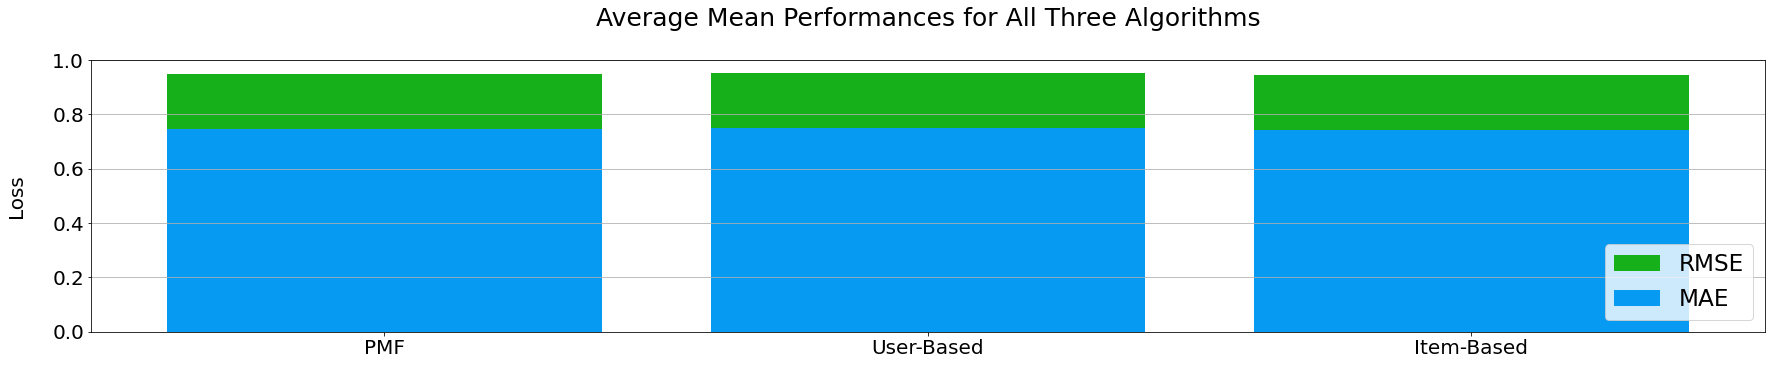

,Algorithms,RMSE,MAE
0,PMF,0.948787,0.747524
1,User-Based,0.951092,0.749283
2,Item-Based,0.944545,0.742327


In [48]:
df = pd.DataFrame(algos, columns = ['Algorithms'])
df['RMSE'] = pd.Series(rmse_mean)
df['MAE'] = pd.Series(mae_mean)

message = 'Average Mean Performances for All Three Algorithms'
Graph_Similarity_Measures(df, 'Algorithms', message)

print('\n')
df

In [10]:
trainset, testset = train_test_split(data, test_size = 0.20)

##  Similarity Measures: User-Based Collaborative Filtering

In [11]:
similarities = ['cosine', 'msd', 'pearson']
user_rmse_li = []
user_mae_li = []

In [12]:
# Cosine Simularity (User-Based)
sim_options = {'name': 'cosine',
               'user_based': True}

user_based_cos = KNNBasic(sim_options = sim_options)
user_based_cos.fit(trainset)

pred = user_based_cos.test(testset)
user_rmse_cos = accuracy.rmse(pred)
user_mae_cos = accuracy.mae(pred)

user_rmse_li.append(user_rmse_cos)
user_mae_li.append(user_mae_cos)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0130
MAE:  0.8007


In [13]:
# MSD Simularity (User-Based)
sim_options = {'name': 'msd',
               'user_based': True}

user_based_cos = KNNBasic(sim_options = sim_options)
user_based_cos.fit(trainset)

pred = user_based_cos.test(testset)
user_rmse_cos = accuracy.rmse(pred)
user_mae_cos = accuracy.mae(pred)

user_rmse_li.append(user_rmse_cos)
user_mae_li.append(user_mae_cos)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9758
MAE:  0.7703


In [14]:
# Pearson Simularity (User-Based)
sim_options = {'name': 'pearson',
               'user_based': True}

user_based_cos = KNNBasic(sim_options = sim_options)
user_based_cos.fit(trainset)

pred = user_based_cos.test(testset)
user_rmse_cos = accuracy.rmse(pred)
user_mae_cos = accuracy.mae(pred)

user_rmse_li.append(user_rmse_cos)
user_mae_li.append(user_mae_cos)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0077
MAE:  0.7994


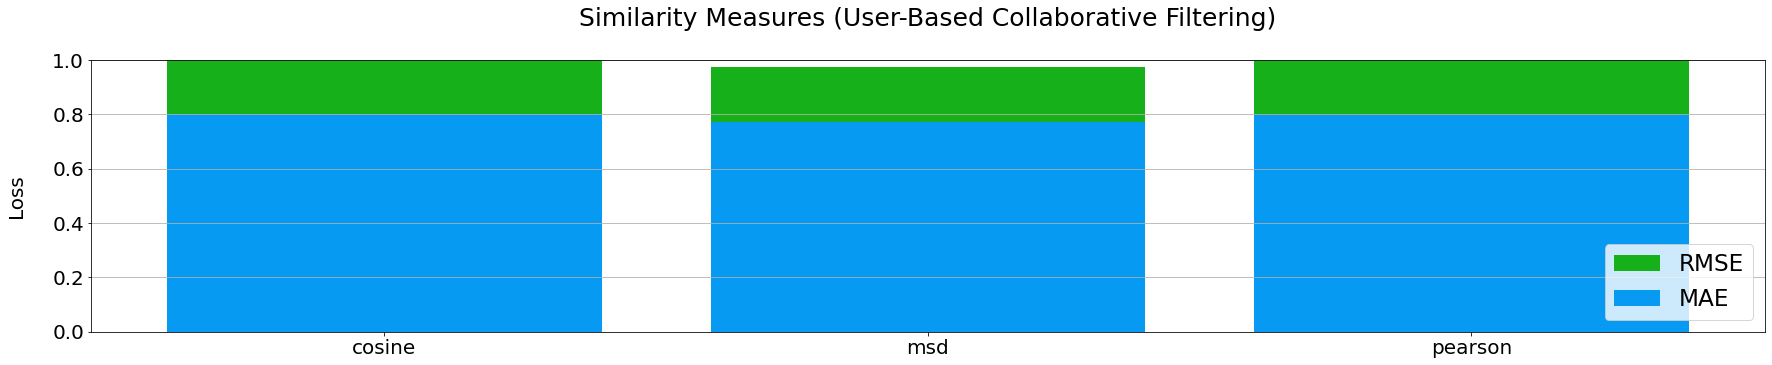

,Similarities,RMSE,MAE
0,cosine,1.012999,0.800701
1,msd,0.975768,0.770272
2,pearson,1.007667,0.799398


In [49]:
user_df = pd.DataFrame(similarities, columns = ['Similarities'])
user_df['RMSE'] = pd.Series(user_rmse_li)
user_df['MAE'] = pd.Series(user_mae_li)

message = 'Similarity Measures (User-Based Collaborative Filtering)'
Graph_Similarity_Measures(user_df, 'Similarities', message)

print('\n')
user_df

## Similarity Measure: Item-Based Collaborative Filtering

In [16]:
item_rmse_li = []
item_mae_li = []

In [17]:
# Cosine Simularity (Item-Based)
sim_options = {'name': 'cosine',
               'user_based': False}

item_based_cos = KNNBasic(sim_options = sim_options)
item_based_cos.fit(trainset)

pred = item_based_cos.test(testset)
item_rmse_cos = accuracy.rmse(pred)
item_mae_cos = accuracy.mae(pred)

item_rmse_li.append(item_rmse_cos)
item_mae_li.append(item_mae_cos)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0297
MAE:  0.8125


In [18]:
# MSD Simularity (Item-Based)
sim_options = {'name': 'msd',
               'user_based': False}

item_based_cos = KNNBasic(sim_options = sim_options)
item_based_cos.fit(trainset)

pred = item_based_cos.test(testset)
item_rmse_cos = accuracy.rmse(pred)
item_mae_cos = accuracy.mae(pred)

item_rmse_li.append(item_rmse_cos)
item_mae_li.append(item_mae_cos)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9773
MAE:  0.7705


In [19]:
# Pearson Simularity (Item-Based)
sim_options = {'name': 'pearson',
               'user_based': False}

item_based_cos = KNNBasic(sim_options = sim_options)
item_based_cos.fit(trainset)

pred = item_based_cos.test(testset)
item_rmse_cos = accuracy.rmse(pred)
item_mae_cos = accuracy.mae(pred)

item_rmse_li.append(item_rmse_cos)
item_mae_li.append(item_mae_cos)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0411
MAE:  0.8332


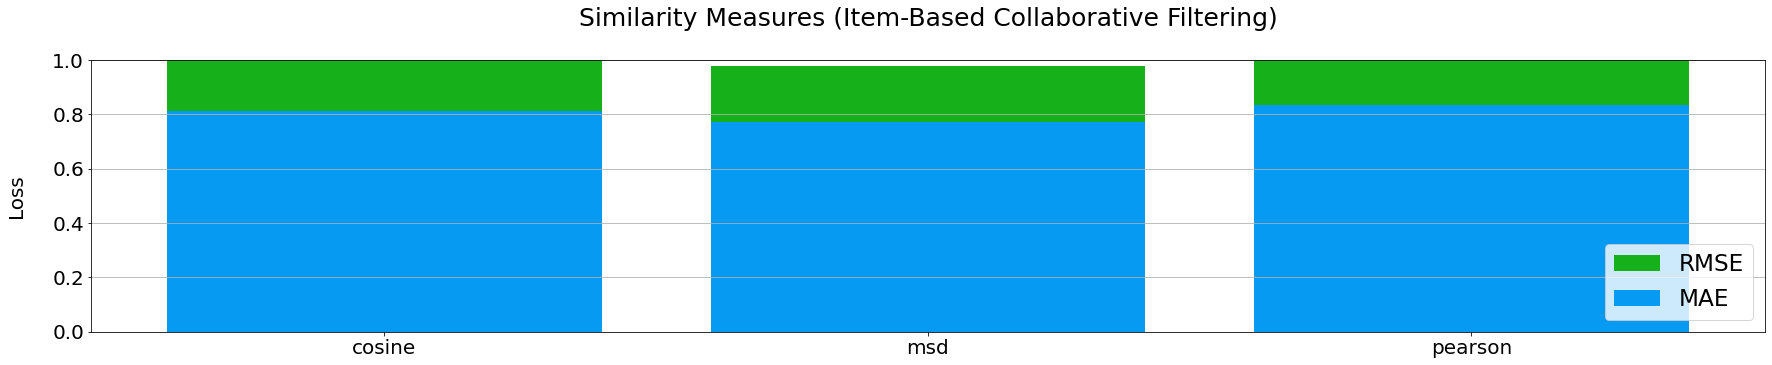

,Similarities,RMSE,MAE
0,cosine,1.029744,0.812497
1,msd,0.977268,0.770469
2,pearson,1.041126,0.833227


In [50]:
item_df = pd.DataFrame(similarities, columns = ['Similarities'])
item_df['RMSE'] = pd.Series(item_rmse_li)
item_df['MAE'] = pd.Series(item_mae_li)

message = 'Similarity Measures (Item-Based Collaborative Filtering)'
Graph_Similarity_Measures(item_df, 'Similarities', message)

print('\n')
item_df

## Number of Neighbors: User-Based Collaborative Filtering

In [21]:
neighbors = [5, 10, 15, 20]
user_rmse_li_k = []
user_mae_li_k = []

In [22]:
# K = 5 Simularity (User-Based)
sim_options = {'user_based': True}

user_based_5 = KNNBasic(k = 5, sim_options = sim_options)
user_based_5.fit(trainset)

pred = user_based_5.test(testset)
user_rmse_5 = accuracy.rmse(pred)
user_mae_5 = accuracy.mae(pred)

user_rmse_li_k.append(user_rmse_5)
user_mae_li_k.append(user_mae_5)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0250
MAE:  0.8051


In [23]:
# K = 10 Simularity (User-Based)
sim_options = {'user_based': True}

user_based_10 = KNNBasic(k = 10, sim_options = sim_options)
user_based_10.fit(trainset)

pred = user_based_10.test(testset)
user_rmse_10 = accuracy.rmse(pred)
user_mae_10 = accuracy.mae(pred)

user_rmse_li_k.append(user_rmse_10)
user_mae_li_k.append(user_mae_10)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9879
MAE:  0.7770


In [24]:
# K = 15 Simularity (User-Based)
sim_options = {'user_based': True}

user_based_15 = KNNBasic(k = 15, sim_options = sim_options)
user_based_15.fit(trainset)

pred = user_based_15.test(testset)
user_rmse_15 = accuracy.rmse(pred)
user_mae_15 = accuracy.mae(pred)

user_rmse_li_k.append(user_rmse_15)
user_mae_li_k.append(user_mae_15)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9777
MAE:  0.7696


In [25]:
# K = 20 Simularity (User-Based)
sim_options = {'user_based': True}

user_based_20 = KNNBasic(k = 20, sim_options = sim_options)
user_based_20.fit(trainset)

pred = user_based_20.test(testset)
user_rmse_20 = accuracy.rmse(pred)
user_mae_20 = accuracy.mae(pred)

user_rmse_li_k.append(user_rmse_20)
user_mae_li_k.append(user_mae_20)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9741
MAE:  0.7676


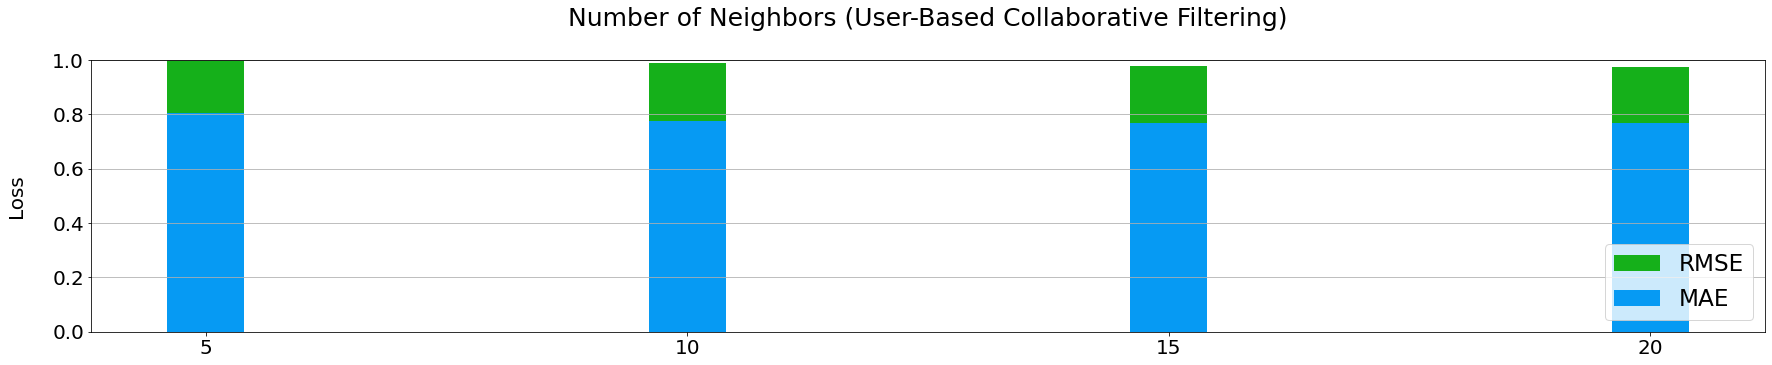

,Number of Neighbors,RMSE,MAE
0,5,1.024960,0.805104
1,10,0.987909,0.777040
2,15,0.977723,0.769557
3,20,0.974103,0.767593


In [51]:
user_df = pd.DataFrame(neighbors, columns = ['Number of Neighbors'])
user_df['RMSE'] = pd.Series(user_rmse_li_k)
user_df['MAE'] = pd.Series(user_mae_li_k)

message = 'Number of Neighbors (User-Based Collaborative Filtering)'
Graph_Similarity_Measures(user_df, 'Number of Neighbors', message)

print('\n')
user_df

## Number of Neighbors: Item-Based Collaborative Filtering

In [27]:
item_rmse_li_k = []
item_mae_li_k = []

In [28]:
# K = 5 Simularity (Item-Based)
sim_options = {'user_based': False}

item_based_5 = KNNBasic(k = 5, sim_options = sim_options)
item_based_5.fit(trainset)

pred = item_based_5.test(testset)
item_rmse_5 = accuracy.rmse(pred)
item_mae_5 = accuracy.mae(pred)

item_rmse_li_k.append(item_rmse_5)
item_mae_li_k.append(item_mae_5)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0794
MAE:  0.8436


In [29]:
# K = 10 Simularity (Item-Based)
sim_options = {'user_based': False}

item_based_10 = KNNBasic(k = 10, sim_options = sim_options)
item_based_10.fit(trainset)

pred = item_based_10.test(testset)
item_rmse_10 = accuracy.rmse(pred)
item_mae_10 = accuracy.mae(pred)

item_rmse_li_k.append(item_rmse_10)
item_mae_li_k.append(item_mae_10)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0177
MAE:  0.8011


In [30]:
# K = 15 Simularity (Item-Based)
sim_options = {'user_based': False}

item_based_15 = KNNBasic(k = 15, sim_options = sim_options)
item_based_15.fit(trainset)

pred = item_based_15.test(testset)
item_rmse_15 = accuracy.rmse(pred)
item_mae_15 = accuracy.mae(pred)

item_rmse_li_k.append(item_rmse_15)
item_mae_li_k.append(item_mae_15)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9971
MAE:  0.7866


In [31]:
# K = 20 Simularity (Item-Based)
sim_options = {'user_based': False}

item_based_20 = KNNBasic(k = 20, sim_options = sim_options)
item_based_20.fit(trainset)

pred = item_based_20.test(testset)
item_rmse_20 = accuracy.rmse(pred)
item_mae_20 = accuracy.mae(pred)

item_rmse_li_k.append(item_rmse_20)
item_mae_li_k.append(item_mae_20)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9870
MAE:  0.7784


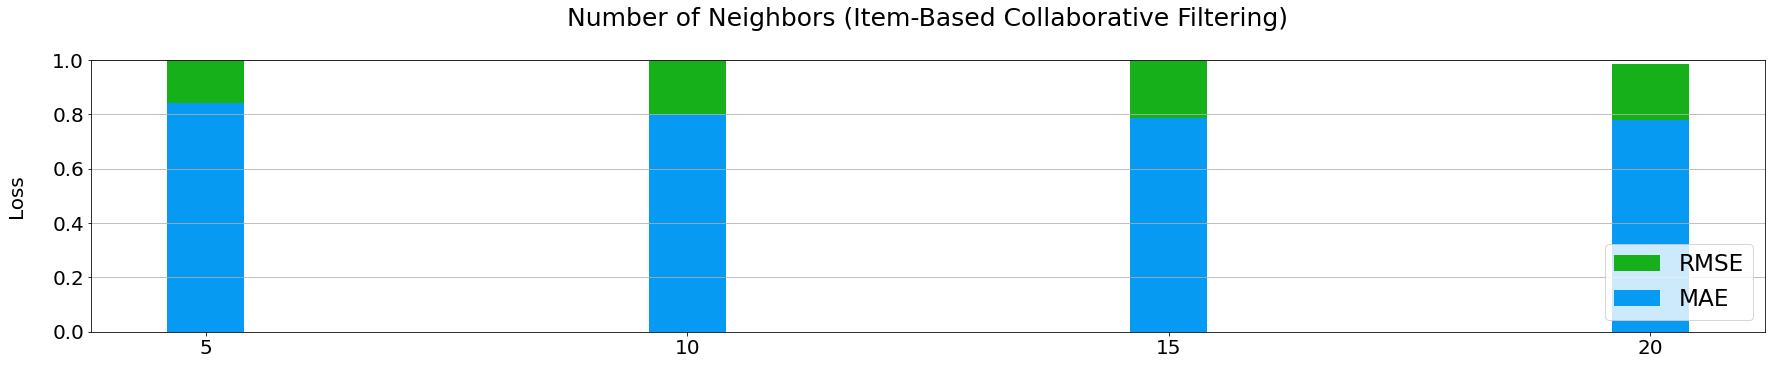

,Number of Neighbors,RMSE,MAE
0,5,1.079416,0.843567
1,10,1.017653,0.801118
2,15,0.997116,0.786555
3,20,0.987035,0.778438


In [52]:
item_df = pd.DataFrame(neighbors, columns = ['Number of Neighbors'])
item_df['RMSE'] = pd.Series(item_rmse_li_k)
item_df['MAE'] = pd.Series(item_mae_li_k)

message = 'Number of Neighbors (Item-Based Collaborative Filtering)'
Graph_Similarity_Measures(item_df, 'Number of Neighbors', message)

print('\n')
item_df